<a href="https://colab.research.google.com/github/rmtkazizi/rahmatikaazizi.github.io/blob/main/K_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# PORTFOLIO 2 :**
# **BANK CUSTOMER CLUSTERING USING K-MODES CLUSTERING**

Data: Bank Marketing - Kaggle
Methode: K-Modes Clustering

# Importing Libraries

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn.decomposition import PCA

pd.set_option('mode.chained_assignment', None)

# Loading the Dataset

In [ ]:
# import data
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
bank = pd.read_csv('/content/drive/MyDrive/Project/DATA PROJECT PORTOFOLIO/Project 2_bankmarketing.csv')
bank.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Preparation

## Cleaning the Data

### Missing Data

In [ ]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing data

### Data duplicate

In [ ]:
bank.duplicated().sum()

12

In [ ]:
print(bank.duplicated().sum())
bank.drop_duplicates(inplace=True)
print(bank.duplicated().sum)

12
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41176, dtype: bool>


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

There are 12 duplicate data and no missing data, the remaining 41176 data after the duplicated data is deleted

## Data Inspection

Examines what attributes are contained in the data, and selects the age (numeric) atribute and all attribute categories for grouping

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
BankClust = bank [['age', 'job', 'marital', 'education', 'default', 'housing', 
                   'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
BankClust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


Convert numeric attribute (Age) to categorical attribute

In [ ]:
BankClust['age_bin'] = pd.cut(BankClust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
BankClust  = BankClust.drop('age',axis = 1)
BankClust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [ ]:
BankClust.shape

(41176, 11)

In [ ]:
BankClust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,16380


In [ ]:
BankClust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41176 non-null  object  
 1   marital      41176 non-null  object  
 2   education    41176 non-null  object  
 3   default      41176 non-null  object  
 4   housing      41176 non-null  object  
 5   loan         41176 non-null  object  
 6   contact      41176 non-null  object  
 7   month        41176 non-null  object  
 8   day_of_week  41176 non-null  object  
 9   poutcome     41176 non-null  object  
 10  age_bin      41176 non-null  category
dtypes: category(1), object(10)
memory usage: 3.5+ MB


In [ ]:
BankClust2 = BankClust.copy()

Label encoding (changes category data in numeric form)

In [ ]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
BankClust = BankClust.apply(LE.fit_transform)
BankClust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


## Export the Data

In [ ]:
#Export the Data
BankClust2.to_csv('BankClust2.csv', index=False)

# Clustering

## Number of Clusters using the Elbow Method

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216895.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5320, cost: 192149.0
Run 1, iteration: 2/100, moves: 1159, cost: 192149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185089.0
Run 1, iteration: 2/100, moves: 1367, cost: 185089.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6184, cost: 179727.0
Run 1, iteration: 2/100, moves: 1394, cost: 179727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4104, cost: 174287.0
Run 1, iteration: 2/100, moves: 1762, cost: 174287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4709, cost: 17

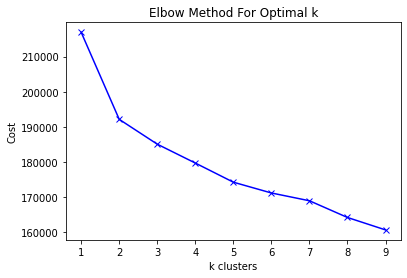

In [ ]:
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(BankClust)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

The estimation of the optimum number of clusters based on the elbow method is 2. However, to see if k=2 is the optimum cluster, it is necessary to compare the validation value of several number of clusters. So that the estimated number of clusters is 2, 3, and 4.

## K-Modes

In [ ]:
Clust2 = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
Cluster2 = Clust2.fit_predict(BankClust)
Cluster2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5317, cost: 233324.0
Run 1, iteration: 2/100, moves: 1164, cost: 233323.0
Run 1, iteration: 3/100, moves: 0, cost: 233323.0


array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
Clustcentroid2 = pd.DataFrame(Clust2.cluster_centroids_)
Clustcentroid2.columns = BankClust.columns
Clustcentroid2

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,2,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
1,1,blue-collar,married,high.school,no,no,no,telephone,may,fri,nonexistent,40-50


In [ ]:
Clust3 = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
Cluster3 = Clust3.fit_predict(BankClust)
Cluster3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4991, cost: 226264.0
Run 1, iteration: 2/100, moves: 1368, cost: 226262.0
Run 1, iteration: 3/100, moves: 0, cost: 226262.0


array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
Clustcentroid3 = pd.DataFrame(Clust3.cluster_centroids_)
Clustcentroid3.columns = BankClust.columns
Clustcentroid3

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,2,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
1,4,blue-collar,married,high.school,no,no,no,telephone,may,fri,nonexistent,40-50
2,28,technician,married,high.school,unknown,no,no,cellular,jul,wed,nonexistent,20-30


In [ ]:
Clust4 = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
Cluster4 = Clust4.fit_predict(BankClust)
Cluster4

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 223641.0


array([3, 2, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
Clustcentroid4 = pd.DataFrame(Clust4.cluster_centroids_)
Clustcentroid4.columns = BankClust.columns
Clustcentroid4

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,2,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
1,7,blue-collar,single,high.school,no,no,no,telephone,jun,fri,nonexistent,40-50
2,1,technician,married,high.school,unknown,no,no,cellular,jul,wed,nonexistent,20-30
3,0,blue-collar,married,basic.9y,no,no,no,cellular,aug,mon,nonexistent,50-60


## Validity

In [ ]:
from kmodes.kmodes import KModes
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
n_cluster, db = [], []

for i in range(2,5):      
    n_cluster.append(i)
    Valid = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1).fit(BankClust)
    Valid.fit(BankClust)  
    db.append(str(metrics.davies_bouldin_score(BankClust, Valid.labels_)))

validity = pd.DataFrame({'n_clusters': n_cluster, 'Davies Bouldin Score': db})
validity.head()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5320, cost: 192149.0
Run 1, iteration: 2/100, moves: 1159, cost: 192149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5320, cost: 192149.0
Run 1, iteration: 2/100, moves: 1159, cost: 192149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185089.0
Run 1, iteration: 2/100, moves: 1367, cost: 185089.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185089.0
Run 1, iteration: 2/100, moves: 1367, cost: 185089.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6184, cost: 179727.0
Run 1, iteration: 2/100, moves: 1394, cost: 179727.0
Init: initializing centroids
Init: initializing clusters
Starting iter

,n_clusters,Davies Bouldin Score
0,2,5.421793369236924
1,3,4.657383514691847
2,4,4.474605460245095


the results validity of using the Davie Bouldin index shows the number of clusters 4 is the optimum because it has a minimum index value

## Cluster Identification

In [ ]:
BankClust = BankClust2.reset_index()

In [ ]:
Cluster = pd.DataFrame(Cluster4)
Cluster.columns = ['Predicted']
Clustcust = pd.concat([BankClust, Cluster], axis = 1).reset_index()
Clustcust = Clustcust.drop(['index', 'level_0'], axis = 1)
Clustcust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,Predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,3
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,2
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,3


In [ ]:
Clust0 = Clustcust[Clustcust['Predicted'] == 0]
Clust1 = Clustcust[Clustcust['Predicted'] == 1]
Clust2 = Clustcust[Clustcust['Predicted'] == 2]
Clust3 = Clustcust[Clustcust['Predicted'] == 3]

In [ ]:
Clust0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23760 entries, 2 to 41175
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          23760 non-null  object  
 1   marital      23760 non-null  object  
 2   education    23760 non-null  object  
 3   default      23760 non-null  object  
 4   housing      23760 non-null  object  
 5   loan         23760 non-null  object  
 6   contact      23760 non-null  object  
 7   month        23760 non-null  object  
 8   day_of_week  23760 non-null  object  
 9   poutcome     23760 non-null  object  
 10  age_bin      23760 non-null  category
 11  Predicted    23760 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.1+ MB


There are 23760 customers in cluster 1

In [ ]:
Clust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7702 entries, 7 to 41174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          7702 non-null   object  
 1   marital      7702 non-null   object  
 2   education    7702 non-null   object  
 3   default      7702 non-null   object  
 4   housing      7702 non-null   object  
 5   loan         7702 non-null   object  
 6   contact      7702 non-null   object  
 7   month        7702 non-null   object  
 8   day_of_week  7702 non-null   object  
 9   poutcome     7702 non-null   object  
 10  age_bin      7702 non-null   category
 11  Predicted    7702 non-null   uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 684.8+ KB


There are 7702 customers in cluster 2

In [ ]:
Clust2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4430 entries, 1 to 41105
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          4430 non-null   object  
 1   marital      4430 non-null   object  
 2   education    4430 non-null   object  
 3   default      4430 non-null   object  
 4   housing      4430 non-null   object  
 5   loan         4430 non-null   object  
 6   contact      4430 non-null   object  
 7   month        4430 non-null   object  
 8   day_of_week  4430 non-null   object  
 9   poutcome     4430 non-null   object  
 10  age_bin      4430 non-null   category
 11  Predicted    4430 non-null   uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 394.0+ KB


There are 4430 customers in cluster 3

In [ ]:
Clust3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5284 entries, 0 to 41152
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          5284 non-null   object  
 1   marital      5284 non-null   object  
 2   education    5284 non-null   object  
 3   default      5284 non-null   object  
 4   housing      5284 non-null   object  
 5   loan         5284 non-null   object  
 6   contact      5284 non-null   object  
 7   month        5284 non-null   object  
 8   day_of_week  5284 non-null   object  
 9   poutcome     5284 non-null   object  
 10  age_bin      5284 non-null   category
 11  Predicted    5284 non-null   uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 469.9+ KB


There are 3568 customers in cluster 4

## Cluster Visualization

### Percentage of Each Cluster 

In [ ]:
n_cols=1
cols=('Cluster',)
Visual1=pd.DataFrame(Cluster4, columns = cols)
Visual1['VisClust']=pd.cut(Visual1['Cluster'],
                           bins=[-1, 0, 1, 2, 3],
                           labels = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'])
Visual1

,Cluster,VisClust
0,1,Cluster2
1,1,Cluster2
2,0,Cluster1
3,0,Cluster1
4,1,Cluster2
...,...,...
41171,0,Cluster1
41172,1,Cluster2
41173,0,Cluster1
41174,1,Cluster2


job           marital  education          default  housing  loan  contact    month  day_of_week  poutcome     age_bin  Predicted
admin.        single   university.degree  no       yes      no    cellular   aug    thu          nonexistent  30-40    0            43
                                                                                    mon          nonexistent  30-40    0            34
                                                   no       no    cellular   aug    wed          nonexistent  30-40    0            31
              married  university.degree  no       yes      no    cellular   aug    fri          nonexistent  30-40    0            31
                                                   no       no    cellular   aug    thu          nonexistent  30-40    0            29
                                                                                                                                    ..
entrepreneur  married  basic.6y           no       no       n

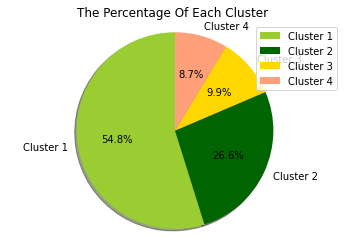

In [ ]:
import matplotlib.pyplot as plt
labels = 'Cluster 1' , 'Cluster 2', 'Cluster 3' , 'Cluster 4'

sizes = Persentage
print(sizes)
labels = list(labels)

print(labels)
colors = ['yellowgreen','darkgreen', 'gold', 'lightsalmon']
plt.pie(list(Visual1['VisClust'].value_counts()), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)  
plt.axis('equal')
plt.title('The Percentage Of Each Cluster ')
plt.legend()
plt.show()

The most customers are in cluster 1, which is 54.8%, then followed by clusters 2, 3, and 4 at 26.6%, 9.9%, and 8.7%

### The Main Job of Each Cluster 

In [ ]:
Clustcust.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

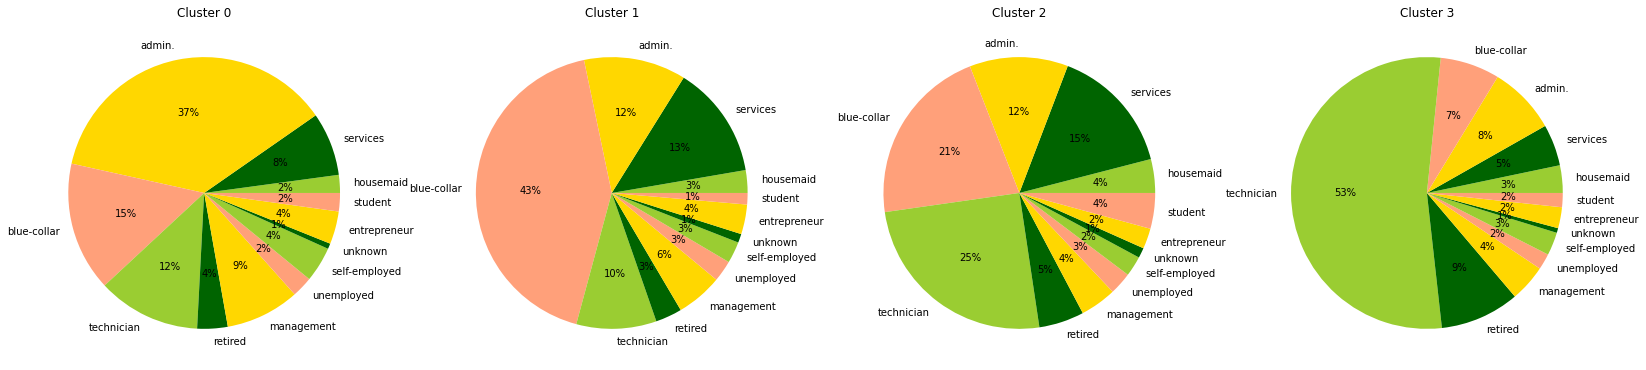

In [ ]:
plt.figure(figsize = (28,16) )
jobs =['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student']
for i in range(4):
    counts =[]
    d = Clustcust[Clustcust['Predicted'] == i]
    counts.append(len(d[d['job'] == 'housemaid']))
    counts.append(len(d[d['job'] == 'services']))
    counts.append(len(d[d['job'] == 'admin.'])) 
    counts.append(len(d[d['job'] == 'blue-collar']))
    counts.append(len(d[d['job'] == 'technician']))    
    counts.append(len(d[d['job'] == 'retired'])) 
    counts.append(len(d[d['job'] == 'management']))
    counts.append(len(d[d['job'] == 'unemployed']))    
    counts.append(len(d[d['job'] == 'self-employed'])) 
    counts.append(len(d[d['job'] == 'unknown']))
    counts.append(len(d[d['job'] == 'entrepreneur']))    
    counts.append(len(d[d['job'] == 'student']))    
    plt.subplot(1,4,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = jobs, autopct='%.0f%%' ,colors=['yellowgreen','darkgreen', 'gold', 'lightsalmon'])
plt.show()

- Cluster 1 is a cluster with customers with their dominant job as admin, which is 37%
- Cluster 2 is a cluster with customers with their dominant job as blue collar, which is 43%
-Cluster 3 is a cluster with customers with their dominant job as technician, which is 25%
-Cluster 4 is a cluster with customers whose dominant jobs is as a technician, and customers with technician dominated jobs in cluster 4 are more than in cluster 3, which is 53%

### The Main Age of Each Cluster

In [ ]:
Clustcust.age_bin.unique()

['50-60', '30-40', '40-50', '20-30', '0-20', '60-70', '70-80', '80-90', '90-100']
Categories (9, object): ['0-20' < '20-30' < '30-40' < '40-50' ... '60-70' < '70-80' < '80-90' < '90-100']

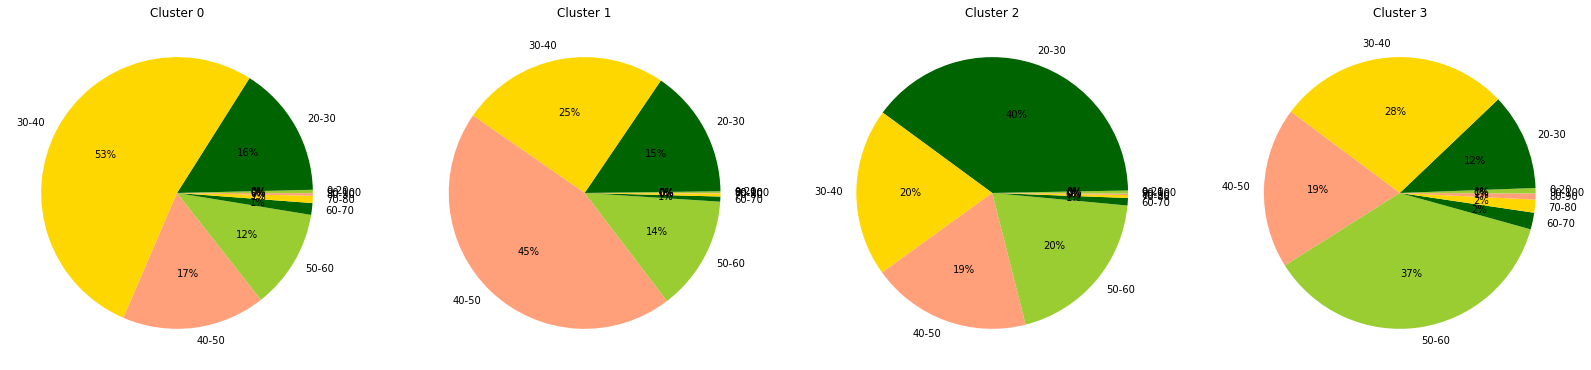

In [ ]:
plt.figure(figsize = (28,16) )
age =['0-20','20-30',  '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
for i in range(4):
    counts =[]
    d = Clustcust[Clustcust['Predicted'] == i]
    counts.append(len(d[d['age_bin'] == '0-20']))
    counts.append(len(d[d['age_bin'] == '20-30']))
    counts.append(len(d[d['age_bin'] == '30-40'])) 
    counts.append(len(d[d['age_bin'] == '40-50']))
    counts.append(len(d[d['age_bin'] == '50-60']))    
    counts.append(len(d[d['age_bin'] == '60-70'])) 
    counts.append(len(d[d['age_bin'] == '70-80']))
    counts.append(len(d[d['age_bin'] == '80-90']))    
    counts.append(len(d[d['age_bin'] == '90-100']))   
    plt.subplot(1,4,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = age, autopct='%.0f%%' ,colors=['yellowgreen','darkgreen', 'gold', 'lightsalmon'])
plt.show()

- Cluster 1 is dominated by customers aged 30-40 years, which is 53%
- Cluster 2 is dominated by customers aged 40-50 years, which is 45%
- Cluster 3 is dominated by customers aged 20-30 years, which is 40%
- Cluster 4 is dominated by customers aged 50-60 years, which is 37%

### The Main Education of Each Cluster 

In [ ]:
Clustcust.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

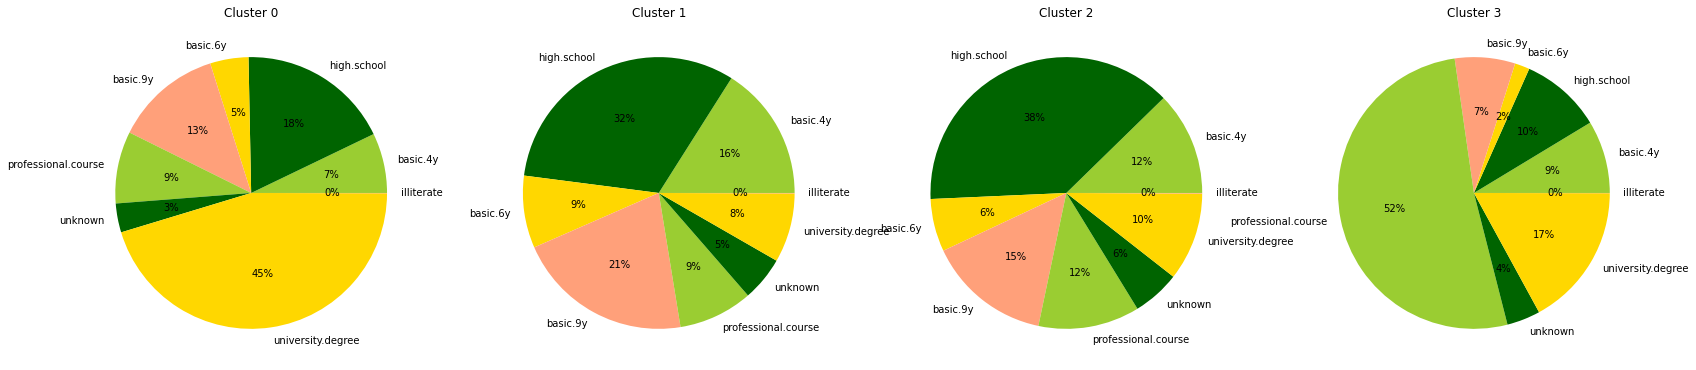

In [ ]:
plt.figure(figsize = (28,16) )
Education =['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate']
for i in range(4):
    counts =[]
    d = Clustcust[Clustcust['Predicted'] == i]
    counts.append(len(d[d['education'] == 'basic.4y']))
    counts.append(len(d[d['education'] == 'high.school']))
    counts.append(len(d[d['education'] == 'basic.6y'])) 
    counts.append(len(d[d['education'] == 'basic.9y']))
    counts.append(len(d[d['education'] == 'professional.course']))    
    counts.append(len(d[d['education'] == 'unknown'])) 
    counts.append(len(d[d['education'] == 'university.degree']))
    counts.append(len(d[d['education'] == 'illiterate']))  
    plt.subplot(1,4,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = Education, autopct='%.0f%%' ,colors=['yellowgreen','darkgreen', 'gold', 'lightsalmon'])
plt.show()

- Cluster 1 is dominated by customers with a university degree education level
- Cluster 2 is dominated by customers with a high school education level
- Cluster 3 is dominated by customers with a high scool education level, but customers with a high school education level in cluster 3 are slighty more than cluster 2
- Cluster 4 is dominated by customers with a professional education level

### The poutcome (Outcome of The Previous Marketing Campaign) of Each Cluster

In [ ]:
Clustcust.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

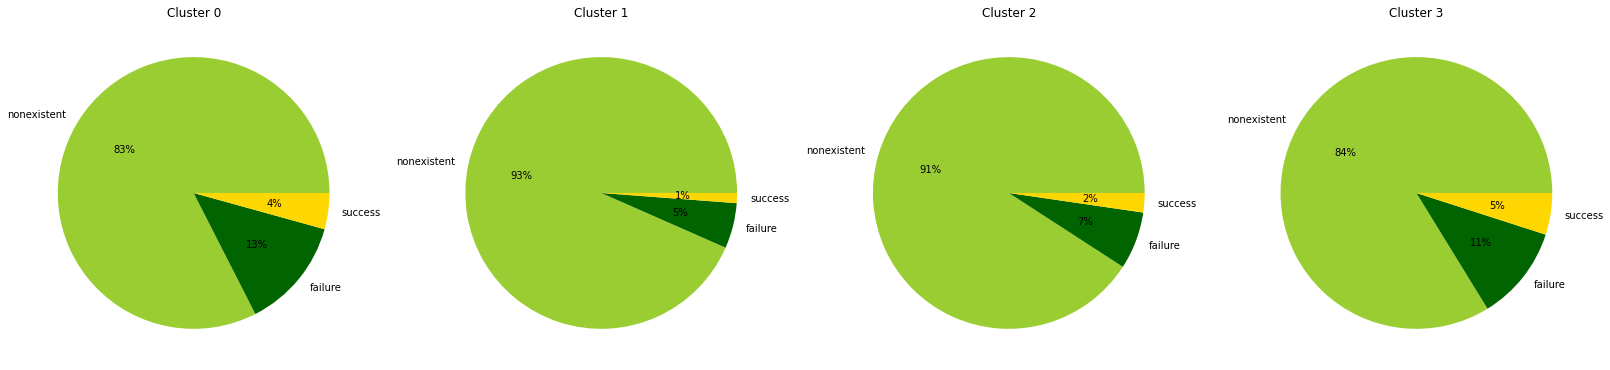

In [ ]:
plt.figure(figsize = (28,16) )
outcome =['nonexistent', 'failure', 'success']
for i in range(4):
    counts =[]
    d = Clustcust[Clustcust['Predicted'] == i]
    counts.append(len(d[d['poutcome'] == 'nonexistent']))
    counts.append(len(d[d['poutcome'] == 'failure']))
    counts.append(len(d[d['poutcome'] == 'success']))  
    plt.subplot(1,4,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = outcome, autopct='%.0f%%' ,colors=['yellowgreen','darkgreen', 'gold', 'lightsalmon'])
plt.show()

Result from previous marketing campaigns show that cluster 2 is the least successful cluster, and followed by clusters 3, 4, and 1

### The Contact Communication Type, Last Contact Month and Day of Each Cluster

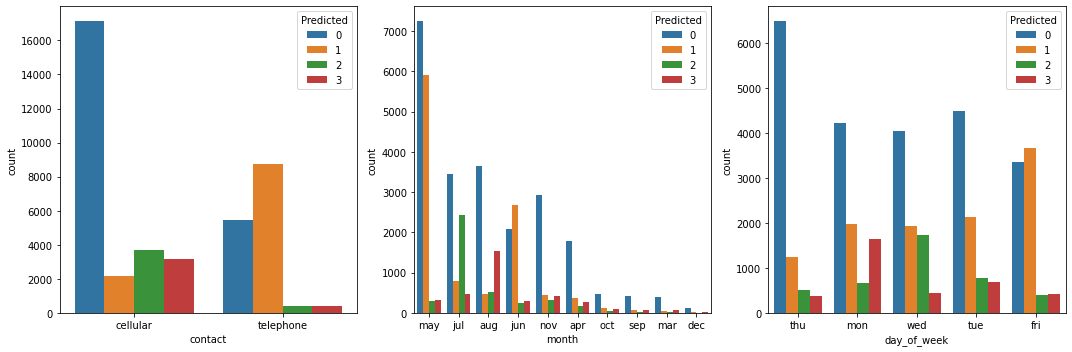

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=Clustcust['contact'],order=Clustcust['contact'].value_counts().index,hue=Clustcust['Predicted'],ax=axs[0])
sns.countplot(x=Clustcust['month'],order=Clustcust['month'].value_counts().index,hue=Clustcust['Predicted'],ax=axs[1])
sns.countplot(x=Clustcust['day_of_week'],order=Clustcust['day_of_week'].value_counts().index,hue=Clustcust['Predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

The type of cellular contact communication is too much used in the first cluster, and telephone in the second cluster. The most recent contacts was in May and Thursday at cluster 1.

### The Marital Status of Each Cluster

In [ ]:
Clustcust.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

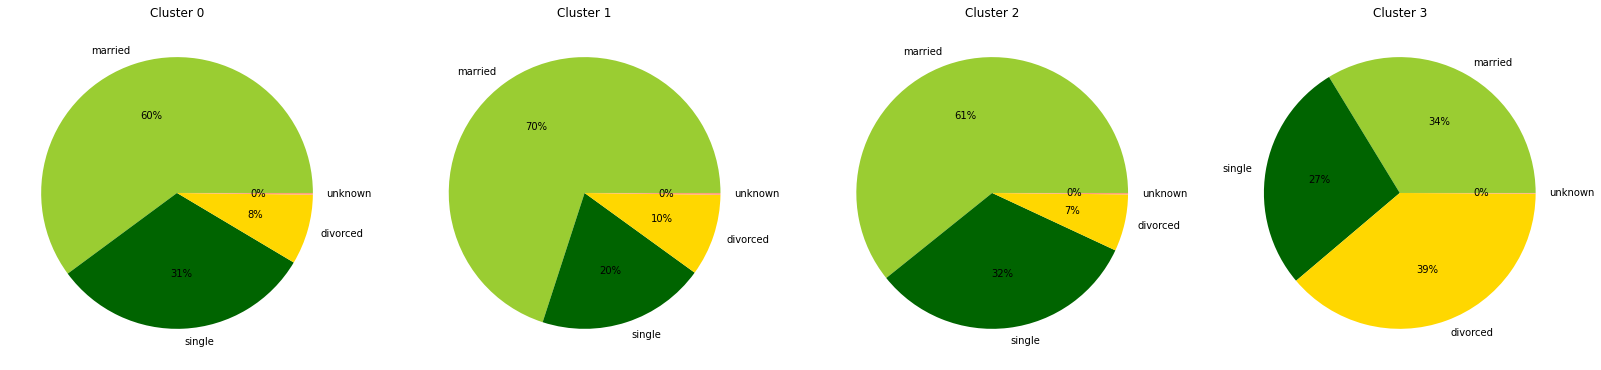

In [ ]:
plt.figure(figsize = (28,16) )
marital =['married', 'single', 'divorced', 'unknown']
for i in range(4):
    counts =[]
    d = Clustcust[Clustcust['Predicted'] == i]
    counts.append(len(d[d['marital'] == 'married']))
    counts.append(len(d[d['marital'] == 'single']))
    counts.append(len(d[d['marital'] == 'divorced'])) 
    counts.append(len(d[d['marital'] == 'unknown']))
    plt.subplot(1,4,i+1)
    plt.title("Cluster "+str(i))
    plt.pie(counts, labels = marital, autopct='%.0f%%' ,colors=['yellowgreen','darkgreen', 'gold', 'lightsalmon'])
plt.show()

Customers with the most 'married' marital status are in cluster 2 as much as 70%, followed by cluster 3, 1, and 4

### The  Credit in Default, Housing Loan, and Personal of Each Cluster

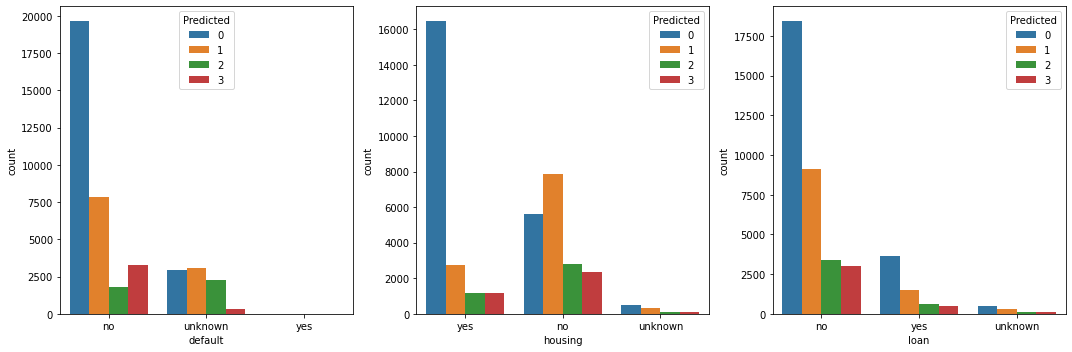

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=Clustcust['default'],order=Clustcust['default'].value_counts().index,hue=Clustcust['Predicted'],ax=axs[0])
sns.countplot(x=Clustcust['housing'],order=Clustcust['housing'].value_counts().index,hue=Clustcust['Predicted'],ax=axs[1])
sns.countplot(x=Clustcust['loan'],order=Clustcust['loan'].value_counts().index,hue=Clustcust['Predicted'], ax=axs[2])

plt.tight_layout()
plt.show()

- Cluster 1 is the cluster with the large number off customers who don't have credit and personal loans buat have the most housing loans. 
- Cluster 2 is the cluster with alarge number of customers who don't have credit, housing loans, and personal loans.


# Conclusion

Masing-masing cluster memiliki cutomer dengan kriteria sebagai berikut:
- Cluster 1 ;
1. Dominated by customers with an age range of 30-40 years
2. Dominated by customers who work as admin
3. Marital status 60% married
4. The education level of custimer are university degree
5. Previous marketing campaign success was only 4%
6. Most customer do not have credit and personal loans, but the most customers have housing loans
7. Dominated by customers with cellular type communication contact
8. The last contact of the most customers is in May and on Thursday

- Cluster 2
1. Dominated by customers with an age range of 40-50 years
2. Dominated by custimers who work as the Blue Collar
3. Marital status 70% married (most married status)
4. The education level of a customer is High School
5. Previous marketing campaign success was only 1% (the least of all compared to other clusters)
6. Dominated by customers who do not have credit, personal loans, and housing loans.
7. Dominated by customers with contact communication type is the telephone
8. The last contact of most customers is in May and on Friday

- Cluster 3
1. Dominant age by customers with a range of 20-30 years (the youngest age category compared to other clusters)
2. Dominated by customers who work as Technician
3. Marital status 61% married
4. The education level of a customer is High School
5. Previous marketing campaign success was only 2%
6. Dominated by customers who do not have housing loans
7. Dominated by customers with cellular type communication contact
8. The most recent customer contact is in July and on Wednesday

- Cluster 4
1. Dominated by customers with an age range of 50-60 years (the oldest category compared to other clusters)
2. Dominant of the work customers are as Technician
3. Marital status 34% married (married status least of all)
4. The education level of the customer is a professional course
5. The success of the previous marketing campaign was only 5% (the most compared to other clusters)
6. Dominated by customers who do not have credit and housing loans
7. Dominated by customer with cellular type communication contact
8. The most recent customer contact in August and Monday.